## ECO 416 Final Project
# Predicting Consumers' Willingness to Buy
#### Rohan Joshi, Raymond Park, Maximilian Sporer
#### 27 Nov 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime as dt

%matplotlib inline

### Dataset
https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store
<br><br>In this project, we will be analyzing e-commerce shopper behaviors over 7 months (from October 2019 to April 2020). The original data contains an observation for every action performed on the site (a shopper viewed an item, put an item in their online cart, or purchased an item). To make the dataset more manageable, we have thrown out all observations that are view actions and have kept only cart and purchase actions.

In [2]:
octdat = pd.read_csv('2019-Oct-Clip.csv')
novdat = pd.read_csv('2019-Nov-Clip.csv')
decdat = pd.read_csv('2019-Dec-Clip.csv')
jandat = pd.read_csv('2020-Jan-Clip.csv')
febdat = pd.read_csv('2020-Feb-Clip.csv')
mardat = pd.read_csv('2020-Mar-Clip.csv')
aprdat = pd.read_csv('2020-Apr-Clip.csv')

df = pd.concat([octdat,novdat,decdat,jandat,febdat,mardat,aprdat])
df = df.drop(columns=['Unnamed: 0'])
df = df.reset_index().drop(columns=['index'])

# change to datetime object for easier manipulation
df['event_time'] = df['event_time'].apply(lambda s: dt.strptime(str(s)[0:19], "%Y-%m-%d %H:%M:%S"))


In [3]:
print("Number of Observations : {}\n".format(df.shape[0]))
n_visitors = df['user_id'].nunique()
print("Number of Unique Visitors: {}\n".format(n_visitors))
print(df.info())
df.head()

Number of Observations : 22805457

Number of Unique Visitors: 3460921

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805457 entries, 0 to 22805456
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.5+ GB
None


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:05:14,cart,5100816,2053013553375346967,NaN,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae
3,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
4,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f


### Monthly Visitor Trend

In [4]:
d = df.loc[:,['event_time','user_id']]
d['event_time'] = d['event_time'].apply(lambda s: str(s)[0:10])
visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)

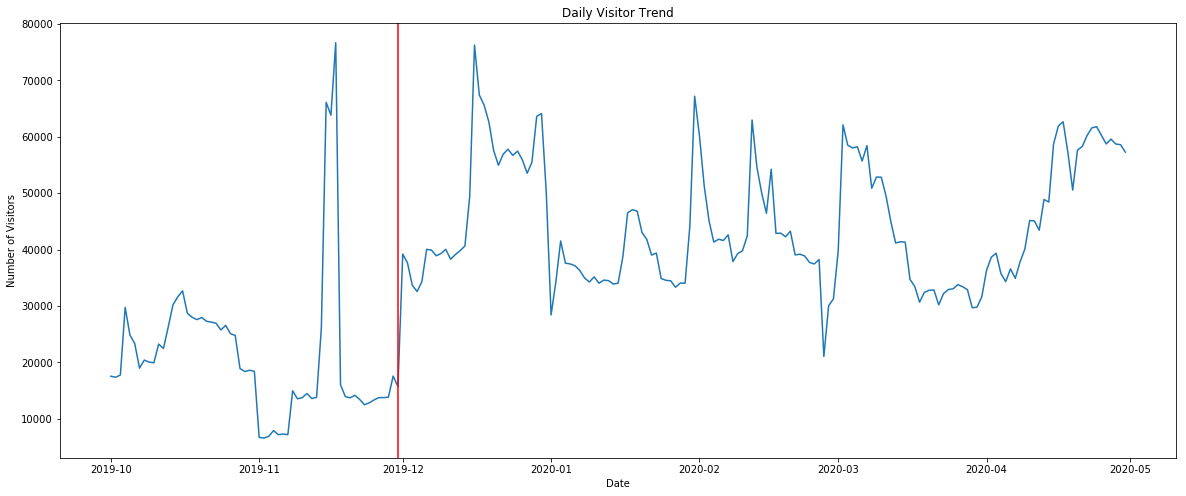

In [5]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: dt.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.title('Daily Visitor Trend')
plt.axvline(pd.Timestamp('2019-11-30'),color='r')
plt.show()

Red line indicates cyber monday. Not sure how to explain the rest of the fluctuation.

### Hourly Visitor Trend

In [6]:
d = df.loc[:,['event_time','user_id']]
d['event_time'] = d['event_time'].apply(lambda s: str(s)[11:16])
visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)

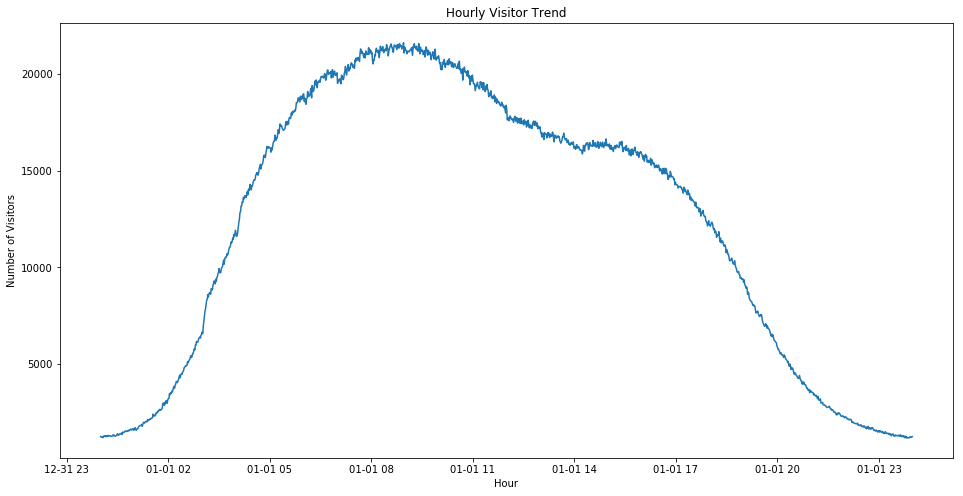

In [7]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: dt.strptime(s, '%H:%M'))
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (16,8)

plt.plot(x,y)
plt.xlabel('Hour')
plt.ylabel('Number of Visitors')
plt.title('Hourly Visitor Trend')
plt.show()

### Data Cleaning

In [4]:
df = df.join(pd.get_dummies(df['event_type']))

In [5]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,cart,purchase
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,0,1
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,0,1
2,2019-10-01 00:05:14,cart,5100816,2053013553375346967,NaN,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae,1,0
3,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,0,1
4,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,0,1


In [6]:
grouped = df.groupby(['product_id','user_id'])
dfGrp = grouped['purchase'].max().reset_index()
dfGrp['number_of_sessions'] = grouped['user_session'].nunique().reset_index()['user_session']
dfGrp['category_code'] = grouped['category_code'].first().reset_index()['category_code']
dfGrp['brand'] = grouped['brand'].first().reset_index()['brand']
dfGrp['category_code1'] = dfGrp['category_code'].str.split(".",expand=True)[0].astype('category')
dfGrp['category_code2'] = dfGrp['category_code'].str.split(".",expand=True)[1].astype('category')
dfGrp.drop(columns=['category_code'],inplace=True)

In [7]:
dfGrp['max_cart_price'] = grouped['price'].max().reset_index()['price']
dfGrp['min_cart_price'] = grouped['price'].min().reset_index()['price']
dfGrp['mean_cart_price'] = grouped['price'].mean().reset_index()['price']
dfGrp['std_cart_price'] = grouped['price'].std().reset_index()['price']

In [8]:
dfGrp['first_cart_time'] = grouped['event_time'].min().reset_index()['event_time']
dfGrp['last_cart_time'] = grouped['event_time'].max().reset_index()['event_time']

In [9]:
dfGrp['time_in_cart'] = dfGrp['last_cart_time'] - dfGrp['first_cart_time']

In [10]:
dfGrp['year'] = pd.DatetimeIndex(dfGrp['first_cart_time']).year

In [11]:
dfGrp['month'] = pd.DatetimeIndex(dfGrp['first_cart_time']).month

In [12]:
dfGrp['hour'] = pd.DatetimeIndex(dfGrp['first_cart_time']).hour
dfGrp['minute'] = pd.DatetimeIndex(dfGrp['first_cart_time']).minute
dfGrp['second'] = pd.DatetimeIndex(dfGrp['first_cart_time']).second

In [13]:
dfGrp['seconds_in_cart'] = dfGrp['time_in_cart'].apply(lambda g: g.total_seconds())

In [14]:
dfGrp['std_cart_price'] = dfGrp['std_cart_price'].fillna(0.0)

In [15]:
dfGrp['weekday'] = pd.DatetimeIndex(dfGrp['first_cart_time']).weekday

In [16]:
dfGrp = dfGrp.drop(columns=['first_cart_time','last_cart_time','time_in_cart'])

In [17]:
dfGrp.head()

,product_id,user_id,purchase,number_of_sessions,brand,category_code1,category_code2,max_cart_price,min_cart_price,mean_cart_price,std_cart_price,year,month,hour,minute,second,seconds_in_cart,weekday
0,1000894,512484276,0,1,texet,electronics,smartphone,73.31,73.31,73.31,0.0,2019,12,19,12,49,0.0,6
1,1000894,592516578,0,1,texet,electronics,smartphone,73.31,73.31,73.31,0.0,2019,12,19,19,1,54.0,2
2,1000978,512405575,0,1,samsung,electronics,smartphone,300.91,300.91,300.91,0.0,2019,11,19,1,25,0.0,1
3,1000978,512691979,0,1,samsung,electronics,smartphone,300.91,300.91,300.91,0.0,2019,11,14,51,29,0.0,3
4,1000978,512952613,0,1,samsung,appliances,kitchen,231.64,231.64,231.64,0.0,2019,12,15,7,22,0.0,6


### IGNORE THIS Label Encoding
This takes forever. If need be, we can down sample data and feed into a classifier. But I think gb will do the job without.

In [28]:
from sklearn.preprocessing import LabelEncoder
import math

dfGrpFull = dfGrp
dfGrp = dfGrp.sample(frac=0.01)

temp = dfGrp['brand'].fillna('none')

type(temp.unique().tolist()[3])

le = LabelEncoder()
le.fit(temp.unique().tolist())
temp = le.transform(temp)

le.inverse_transform([nan])

pd.DataFrame(temp).columns

print(temp)

dfGrp['brand'] = pd.DataFrame(temp)[0]

dfGrp['brand'].unique()

temp.shape

### Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
data = dfGrp.drop(columns=['brand','category_code1','category_code2'])
X = data.drop(columns=['product_id','user_id','purchase'])
y = data['purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Seaborn Exploratory Analysis : Dataset Balance

In [106]:
import seaborn as sns

/Users/maxsporer/opt/anaconda3/envs/eco416/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of Purchases     : 0.4838971792374625
Number of Cart Removals : 0.5161028207625376
Number of Observations  : 8708319


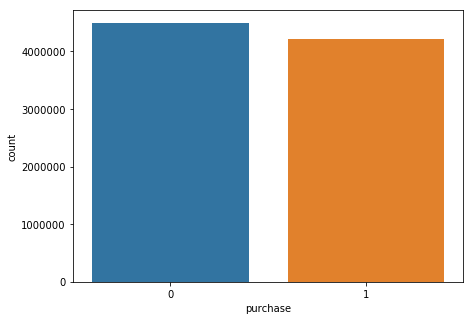

In [18]:
plt.rcParams['figure.figsize'] = (7,5)
y = dfGrp['purchase']
ax = sns.countplot(y,label='Count')
R, C = y.value_counts()
n_obs = y.shape[0]
print('Number of Purchases     :', C/n_obs)
print('Number of Cart Removals :', R/n_obs)
print('Number of Observations  :', n_obs)

###  Seaborn Exploratory Analysis : Pairplots

In [1]:
data = X_train.join(y_train)
data = data[['number_of_sessions', 'mean_cart_price', 'year', 'month', 'hour',
             'seconds_in_cart', 'weekday','purchase']]
data = data.sample(1000)

g = sns.PairGrid(data,hue=y_train.name,palette='Set1')
g.map_upper(plt.scatter)  # upper triangle is the scatter plot
g.map_diag(sns.kdeplot, lw=3)  # diagonal is 1D density
g.map_lower(sns.kdeplot)  # lower triangle is the kernal density

plt.show()

NameError: name 'X_train' is not defined

###  Seaborn Exploratory Analysis : Correlation Matrix

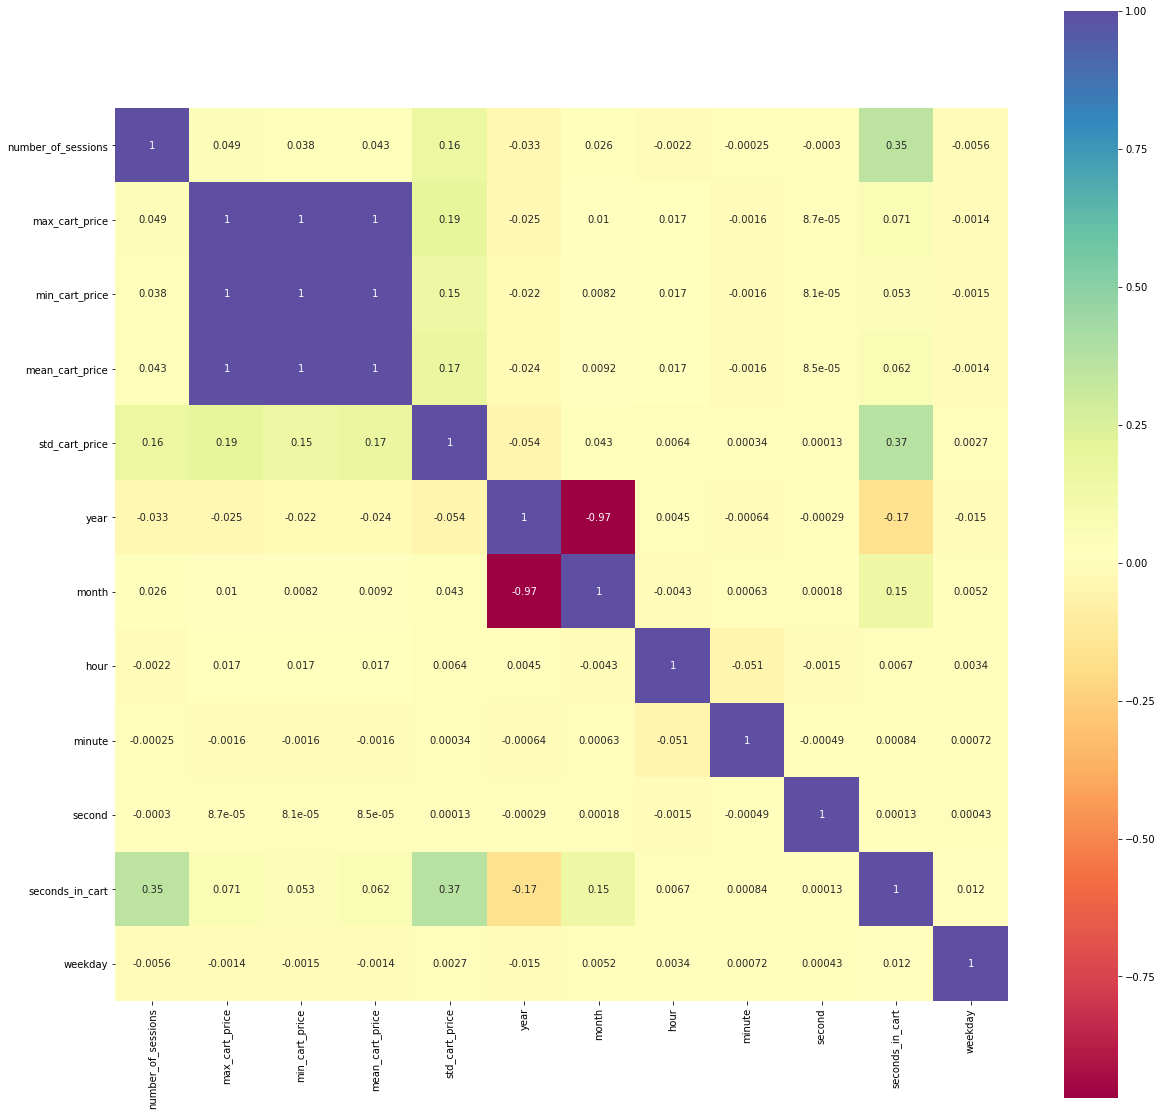

In [20]:
plt.figure(figsize=(20,20))
data = X_train[['number_of_sessions', 'max_cart_price', 'min_cart_price',
       'mean_cart_price', 'std_cart_price', 'year', 'month', 'hour', 'minute',
       'second', 'seconds_in_cart', 'weekday']]
sns.heatmap(data.corr(),annot=True,square=True,cmap='Spectral')
plt.show()

## Classification : Predicting Purchases

### Plotting Metrics

In [132]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

def plot_metrics(model,X_test,y_test):
    
    class_names=['Purchase','No Purchase']
    
    y_pred = model.predict(X_test)
    
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
    
    print("Accuracy    :", accuracy_score(y_test,y_pred))
    print("Precision   :", precision_score(y_test,y_pred))
    print("NPV         :", tn/(tn+fn))
    print("Recall      :", recall_score(y_test,y_pred))
    print("Specificity :", tn/(tn+fp))
    print("F1 Score    :", f1_score(y_test,y_pred))
    
    roc = plot_roc_curve(model,X_test,y_test)
    prc = plot_precision_recall_curve(model,X_test,y_test)
    con = plot_confusion_matrix(model,X_test,y_test,
                          display_labels=class_names,
                          cmap=plt.cm.Blues,normalize='true')

    roc.ax_.set_title('ROC Curve')
    prc.ax_.set_title('Precision-Recall Curve')
    con.ax_.set_title('Confusion Matrix')
    
    plt.show()

### Classifiers : Statsmodels Logistic Regression

In [21]:
import statsmodels.api as sm
X_train_w_const = sm.add_constant(X_train)
smLogit = sm.Logit(y_train.to_numpy(), X_train_w_const).fit()
smLogit.summary2(float_format='%.3f')

/Users/maxsporer/opt/anaconda3/envs/eco416/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maxsporer/opt/anaconda3/envs/eco416/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 16


/Users/maxsporer/opt/anaconda3/envs/eco416/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/maxsporer/opt/anaconda3/envs/eco416/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                   Logit                Pseudo R-squared:     inf   
Dependent Variable:      y                    AIC:                  inf   
Date:                    2020-11-27 09:22     BIC:                  inf   
No. Observations:        6966655              Log-Likelihood:       -inf  
Df Model:                11                   LL-Null:              0.0000
Df Residuals:            6966643              LLR p-value:          1.0000
Converged:               1.0000               Scale:                1.0000
No. Iterations:          16.0000                                          
--------------------------------------------------------------------------
                     Coef.   Std.Err.     z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------------
const              1830.8033  13.7314  133.3295 0.0000 1803.8902 1857.7163
number_of_sessions    0.7129   0.0016  448.7080 0.0000    0.7097    0.7160
max_cart_price        0.0291   0.0006   50.7921 0.0000    0.0280    0.0302
min_cart_price       -0.0410   0.0006  -64.1364 0.0000   -0.0423   -0.0398
mean_cart_price       0.0121   0.0006   20.2963 0.0000    0.0109    0.0132
std_cart_price       -0.0545   0.0009  -62.5234 0.0000   -0.0562   -0.0528
year                 -0.9067   0.0068 -133.3984 0.0000   -0.9200   -0.8934
month                -0.0866   0.0008 -114.6635 0.0000   -0.0880   -0.0851
hour                 -0.0096   0.0002  -61.6545 0.0000   -0.0099   -0.0093
minute               -0.0001   0.0000   -2.5298 0.0114   -0.0002   -0.0000
second                0.0001   0.0000    1.7116 0.0870   -0.0000    0.0002
seconds_in_cart      -0.0000   0.0000  -21.7614 0.0000   -0.0000   -0.0000
weekday              -0.0058   0.0004  -14.9343 0.0000   -0.0066   -0.0050
==========================================================================

"""

### Classifiers : Scikit-Learn Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   41.4s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.9s finished


Logistic Regression on Training Data

Accuracy    : 0.5434971302583521
Precision   : 0.5958549842439174
NPV         : 0.5346869726539278
Recall      : 0.17727647936468027
Specificity : 0.88716499290065
F1 Score    : 0.27325514169511295


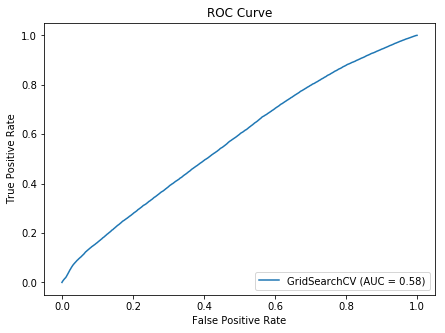

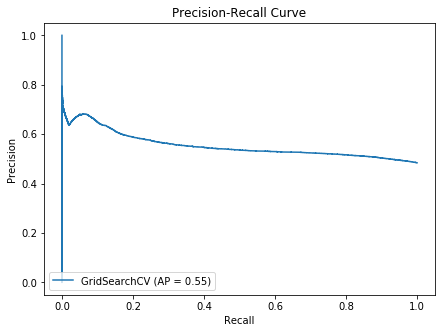

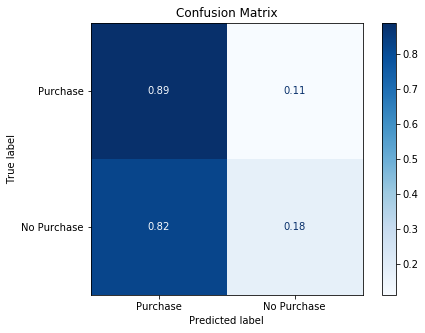


Logistic Regression on Testing Data

Accuracy    : 0.5443805464199754
Precision   : 0.5951373912211534
NPV         : 0.5358398884902245
Recall      : 0.177460901235874
Specificity : 0.8872041999251441
F1 Score    : 0.27339852763432587


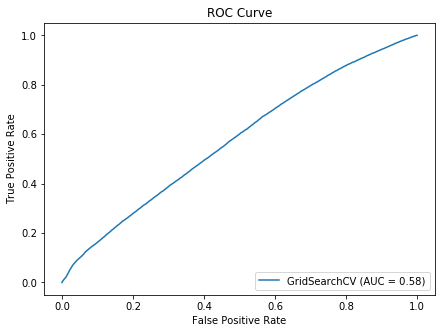

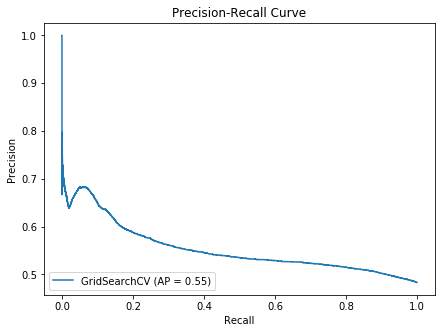

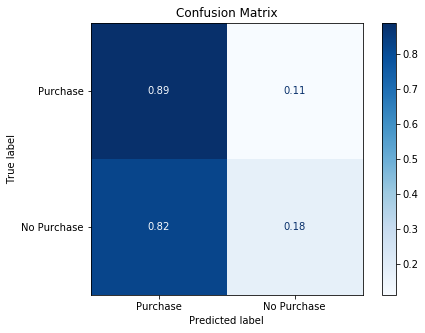

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logit_clf = GridSearchCV(LogisticRegression(),
                        param_grid=dict(),
                        scoring='roc_auc',
                        verbose=1,
                        cv=5,
                        n_jobs=-1)

logit = logit_clf.fit(X_train,y_train)

print('Logistic Regression on Training Data\n')
plot_metrics(logit,X_train,y_train)
print('\nLogistic Regression on Testing Data\n')
plot_metrics(logit,X_test,y_test)

### Downsample and Train Test Split

In [134]:
data = dfGrp.drop(columns=['brand','category_code1','category_code2']).sample(frac=0.1)
X = data.drop(columns=['product_id','user_id','purchase'])
y = data['purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [135]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

svm = SVC()

### Classifier : Support Vector Machine (Linear)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.1s finished
/Users/maxsporer/opt/anaconda3/envs/eco416/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Grid Search Results

Best Score:   0.5017329937245152
Best Params:  {'C': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 100000.0}


/Users/maxsporer/opt/anaconda3/envs/eco416/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)



Linear SVM on Training Data

Accuracy    : 0.5611541774332472
Precision   : 0.7156593406593407
NPV         : 0.5431227957678744
Recall      : 0.15455354494215368
Specificity : 0.9424200278164117
F1 Score    : 0.25420834349841426


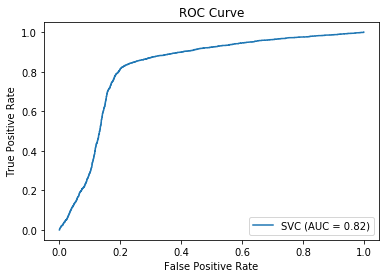

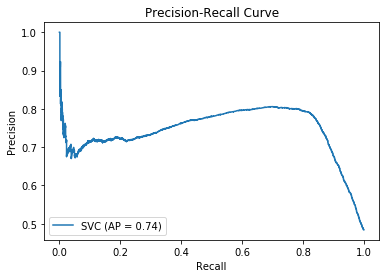

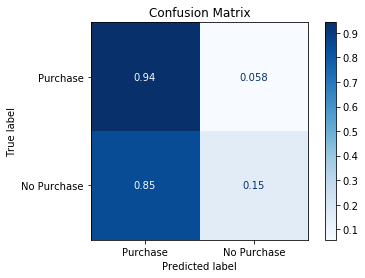


Linear SVM on Testing Data

Accuracy    : 0.5631458094144661
Precision   : 0.7307692307692307
NPV         : 0.5435897435897435
Recall      : 0.15739644970414202
Specificity : 0.9453734671125975
F1 Score    : 0.2590068159688413


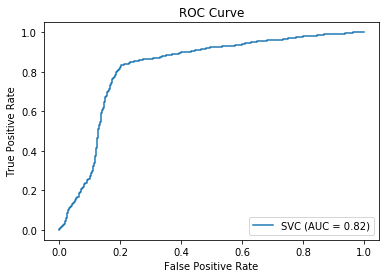

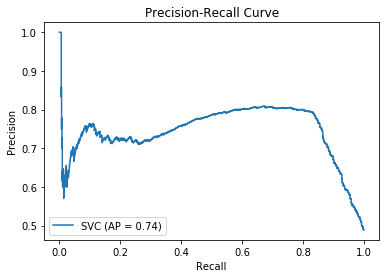

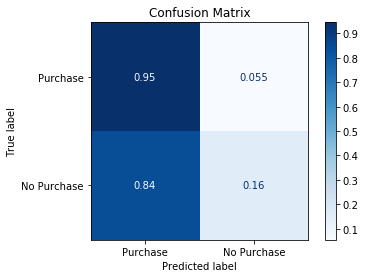

In [180]:
param_grid = dict(C=[1.5,2,2.5],
                  gamma=['scale','auto'],
                  kernel=['linear'],
                  max_iter=[1e5])

grid = GridSearchCV(estimator=svm,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=1,
                    cv=5,
                    n_jobs=-1)

# run grid search
result = grid.fit(X_train, y_train)

print('Grid Search Results\n')
print('Best Score:  ', result.best_score_)
print('Best Params: ', result.best_params_)

lin_svm_clf = SVC(**result.best_params_)
lin_svm = lin_svm_clf.fit(X_train,y_train)

print('\nLinear SVM on Training Data\n')
plot_metrics(lin_svm,X_train,y_train)
print('\nLinear SVM on Testing Data\n')
plot_metrics(lin_svm,X_test,y_test)

### Classifier : Support Vector Machine (Gaussian)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   12.4s finished


Grid Search Results

Best Score:   0.5658907367334727
Best Params:  {'C': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 100000.0}

Gaussian SVM on Training Data

Accuracy    : 0.5658914728682171
Precision   : 0.7193426042983565
NPV         : 0.5462348178137651
Recall      : 0.1687926431326016
Specificity : 0.9382475660639777
F1 Score    : 0.2734262373858722


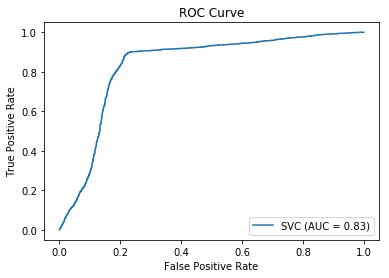

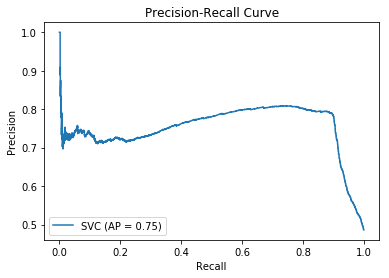

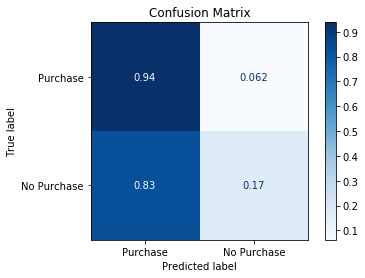


Gaussian SVM on Testing Data

Accuracy    : 0.5648679678530425
Precision   : 0.7208121827411168
NPV         : 0.5449838187702265
Recall      : 0.1680473372781065
Specificity : 0.9386845039018952
F1 Score    : 0.272552783109405


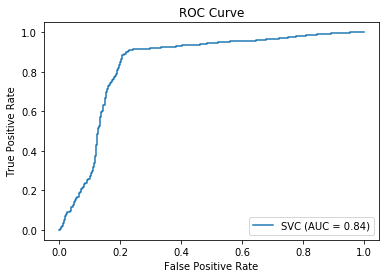

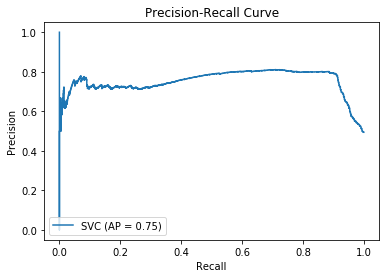

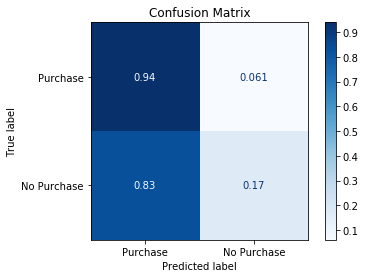

In [179]:
param_grid = dict(C=[1,2,3,4,5,6,7],
                  gamma=['scale'],
                  kernel=['rbf'],
                  max_iter=[1e5])

grid = GridSearchCV(estimator=svm,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=1,
                    cv=5,
                    n_jobs=-1)

result = grid.fit(X_train,y_train)

print('Grid Search Results\n')
print('Best Score:  ', result.best_score_)
print('Best Params: ', result.best_params_)

rbf_svm_clf = SVC(**result.best_params_)
rbf_svm = rbf_svm_clf.fit(X_train,y_train)

print('\nGaussian SVM on Training Data\n')
plot_metrics(rbf_svm,X_train,y_train)
print('\nGaussian SVM on Testing Data\n')
plot_metrics(rbf_svm,X_test,y_test)

### Classifier : Support Vector Machine (Polynomial)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   15.0s finished


Grid Search Results

Best Score:   0.689332911740502
Best Params:  {'C': 15, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 100000.0}
n\Polynomial SVM on Training Data

Accuracy    : 0.808641975308642
Precision   : 0.7995296884185773
NPV         : 0.8173400673400674
Recall      : 0.8068822307920498
Specificity : 0.8102920723226704
F1 Score    : 0.8031891333234903


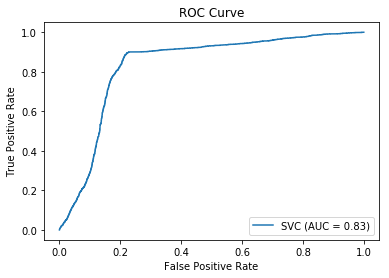

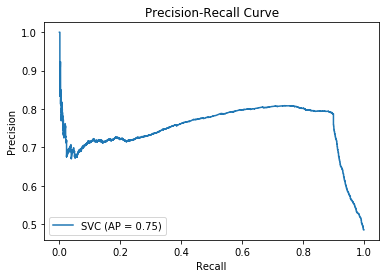

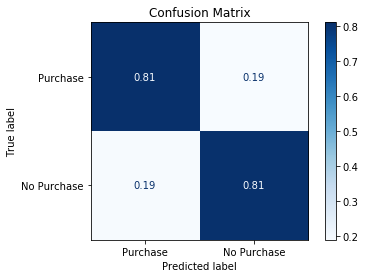

n\Polynomial SVM on Testing Data

Accuracy    : 0.8105625717566016
Precision   : 0.7983777520278099
NPV         : 0.8225255972696246
Recall      : 0.8153846153846154
Specificity : 0.8060200668896321
F1 Score    : 0.806791569086651


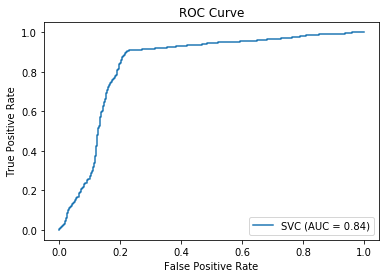

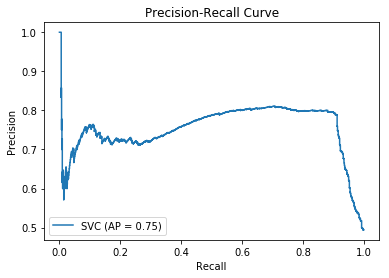

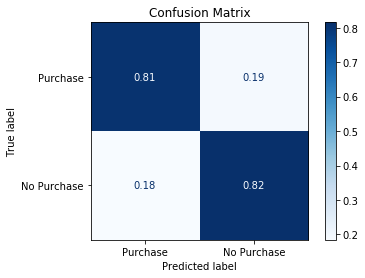

In [183]:
param_grid = dict(C=[5,10,15,18],
                  gamma=['scale','auto'],
                  kernel=['poly'],
                  max_iter=[1e5])

grid = GridSearchCV(estimator=svm,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=1,
                    cv=5,
                    n_jobs=-1)

result = grid.fit(X_train,y_train)

print('Grid Search Results\n')
print('Best Score:  ', result.best_score_)
print('Best Params: ', result.best_params_)

poly_svm_clf = SVC(**result.best_params_)
poly_svm = poly_svm_clf.fit(X_train,y_train)

print('n\Polynomial SVM on Training Data\n')
plot_metrics(poly_svm,X_train,y_train)
print('n\Polynomial SVM on Testing Data\n')
plot_metrics(poly_svm,X_test,y_test)

### Classifier : Gradient Boosting

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  9.9min finished


Randomized Search Results

Best Score RandomSearch:   0.9080324066016197
Best Score RandomSearch:   {'subsample': 0.22333333333333333, 'n_estimators': 71, 'min_samples_leaf': 81, 'max_features': 0.31428571428571433, 'max_depth': None, 'learning_rate': 0.04268421052631579}

Gradient Boosting on Training Data

Accuracy    : 0.851376199464592
Precision   : 0.7903356639876583
NPV         : 0.9345975744211686
Recall      : 0.9427764932162288
Specificity : 0.7657814419693239
F1 Score    : 0.8598518943634043


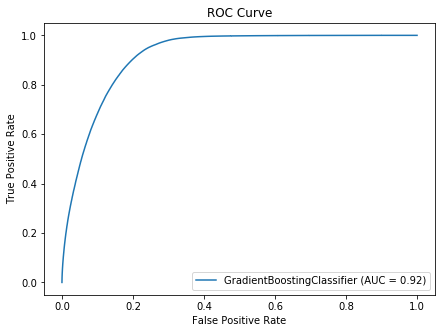

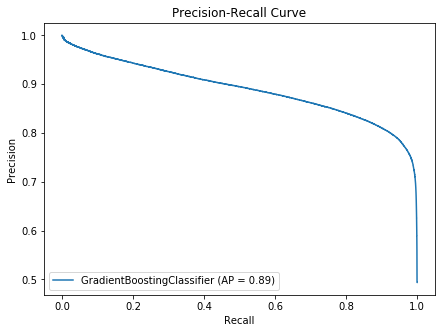

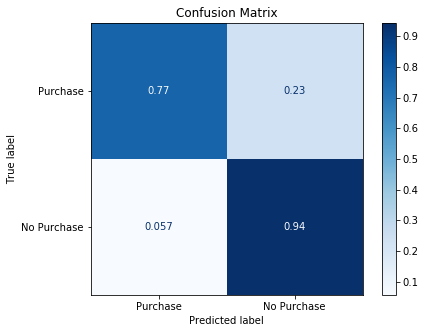


Gradient Boosting on Testing Data

Accuracy    : 0.847204120183502
Precision   : 0.7871156516564174
NPV         : 0.9297994464667948
Recall      : 0.939069415189454
Specificity : 0.7606205596636219
F1 Score    : 0.8564043901017666


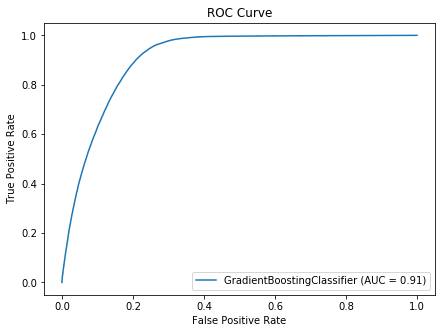

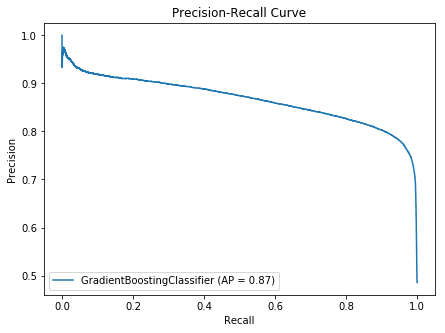

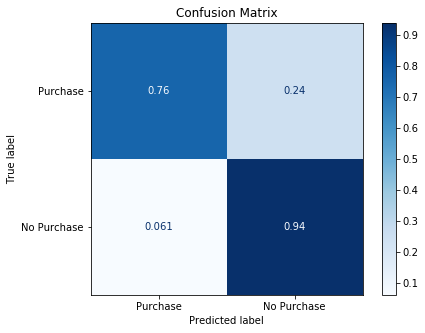

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

param_dists = {'learning_rate':list(np.linspace(0.001,0.1,num=20)),
            'max_depth':list(range(50,60,10))+[None],
            'max_features':list(np.linspace(0.1,0.4,num=8))+[None],
            'min_samples_leaf':list(range(65,85,8))+[None],
            'n_estimators':list(range(55,75,8)),
            'subsample':list(np.linspace(0.01,0.25,num=10))}

rand = RandomizedSearchCV(estimator=skGb,
                      param_distributions=param_dists,
                      n_iter=15,
                      scoring='roc_auc',
                      verbose=1,
                      cv=5,
                      n_jobs=-1)

skGb_rand = rand.fit(X_train,y_train)

print('Randomized Search Results\n')
print('Best Score RandomSearch:  ', skGb_rand.best_score_)
print('Best Score RandomSearch:  ', skGb_rand.best_params_)

gb_clf = GradientBoostingClassifier(**skGb_rand.best_params_)
gb = gb_clf.fit(X_train,y_train)

print('\nGradient Boosting on Training Data\n')
plot_metrics(gb,X_train,y_train)
print('\nGradient Boosting on Testing Data\n')
plot_metrics(gb,X_test,y_test)

### Classifier : Neural Network

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [103]:
def build_model(num_layers,num_nodes,activation,dropout_rate):
    model = Sequential()
    for _ in range(num_layers):
        model.add(layers.Dense(num_nodes,activation=activation))
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1,activation=activation))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [104]:
nn = build_model(8,64,'relu',0.2)
nn.fit(X_train.values,y_train.to_numpy(),epochs=5,batch_size=128)

Train on 69666 samples
Epoch 1/5
69666/69666 [==============================] - 9s 131us/sample - loss: 7.4569 - accuracy: 0.5163
Epoch 2/5
69666/69666 [==============================] - 9s 123us/sample - loss: 7.4483 - accuracy: 0.5171
Epoch 3/5
69666/69666 [==============================] - 9s 124us/sample - loss: 7.4488 - accuracy: 0.5171
Epoch 4/5
69666/69666 [==============================] - 9s 125us/sample - loss: 7.4490 - accuracy: 0.5171
Epoch 5/5
69666/69666 [==============================] - 9s 126us/sample - loss: 7.4490 - accuracy: 0.5171


In [151]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_metrics(model,X_test,y_test):
    
    class_names=['Purchase','No Purchase']
    
    y_pred = model.predict(X_test).ravel()
    print("1",y_pred.shape)
    print("1",y_test.shape)
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
    
    print("Accuracy    :", accuracy_score(y_test,y_pred))
    print("Precision   :", precision_score(y_test,y_pred))
    print("NPV         :", tn/(tn+fn))
    print("Recall      :", recall_score(y_test,y_pred))
    print("Specificity :", tn/(tn+fp))
    print("F1 Score    :", f1_score(y_test,y_pred))
    
    
#     # ROC
#     fpr,tpr,thresholds = roc_curve(y_pred,y_test)
#     auc = auc(fpr,tpr)
#     plt.plot(fpr,tpr,label='NN (AUC = {:.3f})'.format(auc))
#     plt.title('ROC Curve')
#     plt.show()
    
#     # PR Curve
#     pre, rec, thresholds = precision_recall_curve(y_pred,y_test)
#     ap = average_precision_score(y_test,y_pred)
#     plt.plot(rec,pre,label='NN (AP = {:.3f})'.format(ap))
#     plt.title('PR Curve')
#     plt.show()
    
    # Confusion Matrix
    con = confusion_matrix(y_test,y_pred)
    cm = con/con.sum()
    df_cm = pd.DataFrame(cm, index = [i for i in ['Purchase', 'No Purchase']],
                         columns = [i for i in ['Purchase', 'No Purchase']])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True,cmap=plt.cm.Blues)
    plt.show()
    
#     prc = plot_precision_recall_curve(model,X_test,y_test)
#     con = plot_confusion_matrix(model,X_test,y_test,
#                           display_labels=class_names,
#                           cmap=plt.cm.Blues,normalize='true')

#     roc.ax_.set_title('ROC Curve')
#     prc.ax_.set_title('Precision-Recall Curve')
#     con.ax_.set_title('Confusion Matrix')
    
#     plt.show()

1 (69666,)
1 (69666,)
Accuracy    : 0.5170671489679327
Precision   : 0.0
NPV         : 0.5170671489679327


/Users/maxsporer/opt/anaconda3/envs/eco416/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall      : 0.0
Specificity : 1.0
F1 Score    : 0.0


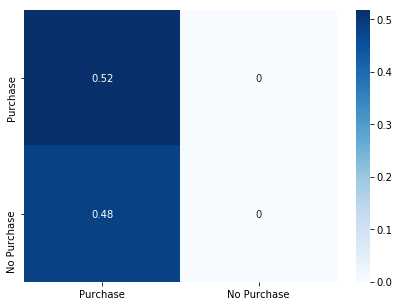

In [152]:
plot_metrics(nn,X_train,y_train)

## Clustering : Finding Potential No Purchase Converts
If we cluster blind of our target variable (``'purchase'``) and then look at the ratio of purchase to no purchase in each cluster, we can selectively target price drops towards no purchasers in clusters with a high ratio of purchasers to no purchasers.

In [149]:
data = dfGrp.drop(columns=['brand','category_code1','category_code2']).sample(frac=0.1)
X = data.drop(columns=['product_id','user_id','purchase'])
y = data['purchase']

In [150]:
from sklearn.cluster import KMeans
from copy import deepcopy
X_copy = deepcopy(X)
kmeans = KMeans(n_clusters = 3).fit(X)

In [151]:
kmeans_df = pd.DataFrame({'label':kmeans.labels_,'purchase':np.array(y)})

In [152]:
clusters_df = kmeans_df.groupby('label')['purchase'].mean().reset_index()
clusters_df = pd.DataFrame(clusters_df).join(pd.DataFrame(data=kmeans.cluster_centers_,columns=X_copy.columns))

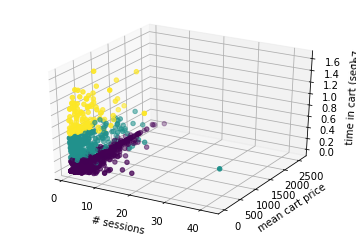

In [153]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X['number_of_sessions']
y = X['mean_cart_price']
z = X['seconds_in_cart']

ax.scatter(x, y, z, c=kmeans.labels_.astype(float))

ax.set_xlabel('# sessions')
ax.set_ylabel('mean cart price')
ax.set_zlabel('time in cart (sec)')

plt.show()

In [154]:
def plot_clusters(df, x_var, y_var, clusters_df):
    
    plt.figure(1)
    
    for i in range(df['label'].nunique()):
        dfLabel = df[df['label']==i]
        x = dfLabel[x_var]
        y = dfLabel[y_var]
        ratiopurchase = clusters_df.iloc[i]['purchase']
        labelstr = 'label ' + str(i) + ' (ratio = {:.3f})'.format(ratiopurchase)
        plt.scatter(x,y,label=labelstr)
        
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(loc='best')
    plt.show()
        

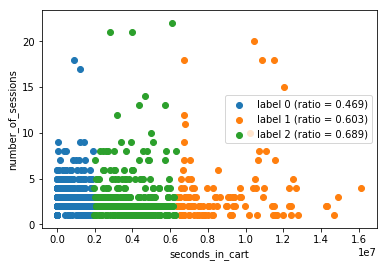

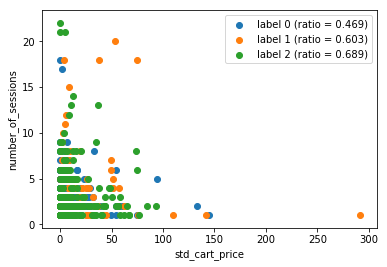

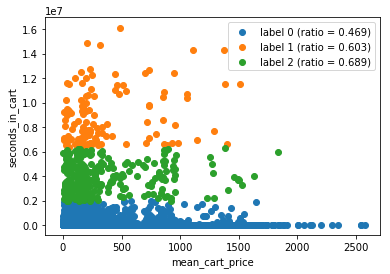

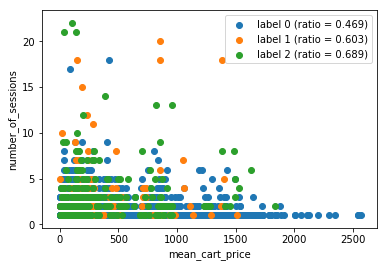

In [125]:
plot_clusters(X,'seconds_in_cart','number_of_sessions',clusters_df)
plot_clusters(X,'std_cart_price','number_of_sessions',clusters_df)
plot_clusters(X,'mean_cart_price','seconds_in_cart',clusters_df)
plot_clusters(X,'mean_cart_price','number_of_sessions',clusters_df)

### Scatter Plot All Combinations of Features

In [158]:
X['label'] = kmeans.labels_

In [160]:
features = X.drop(columns=['minute','second','label']).columns

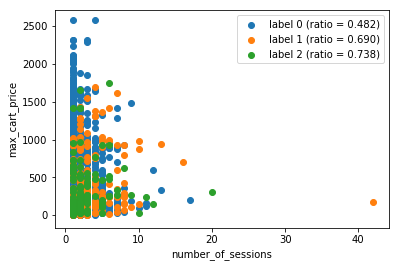

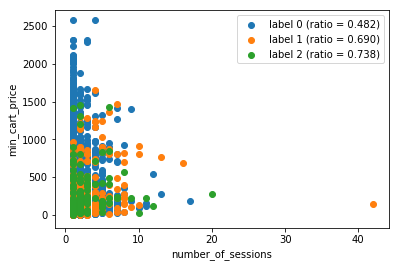

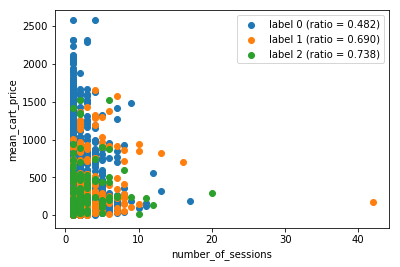

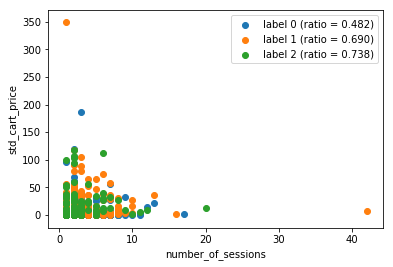

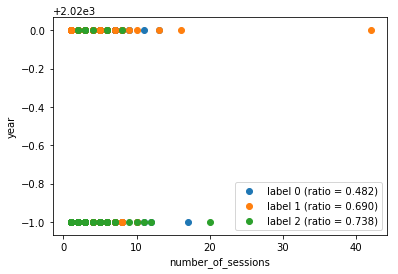

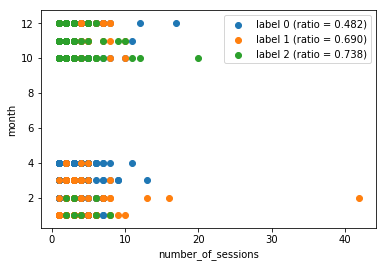

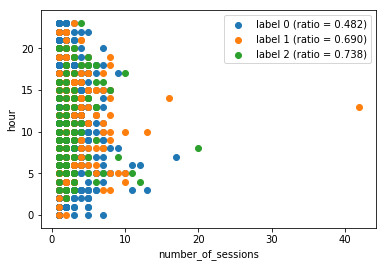

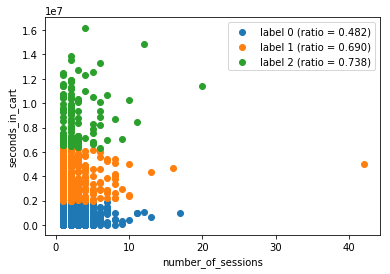

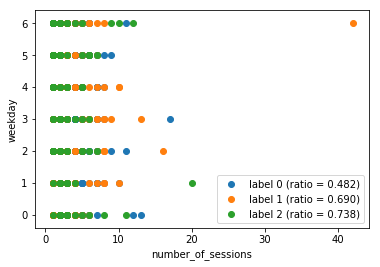

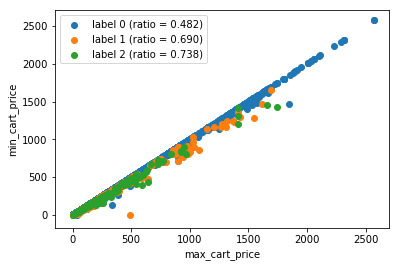

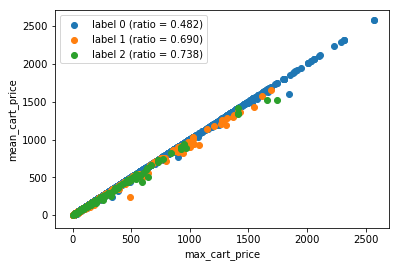

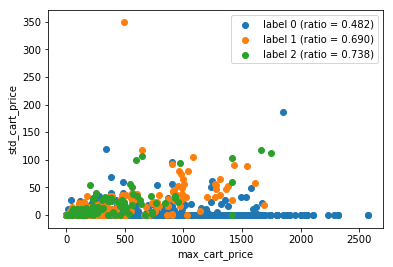

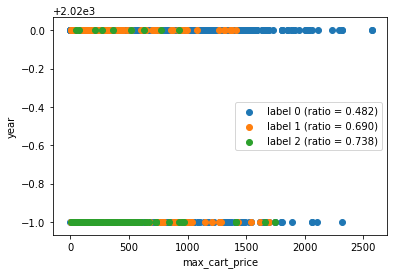

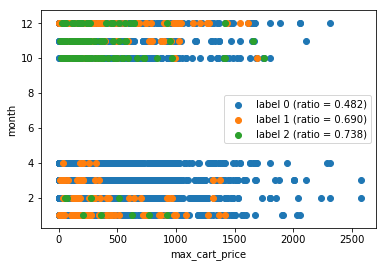

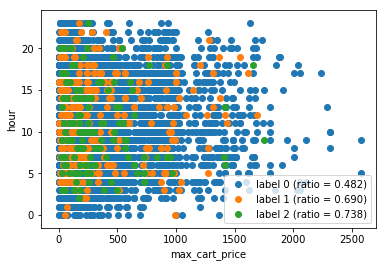

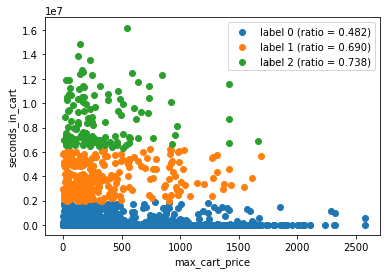

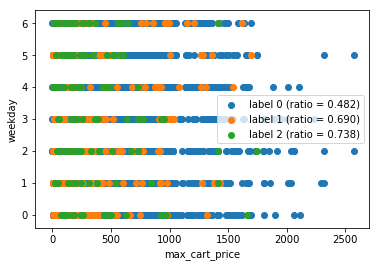

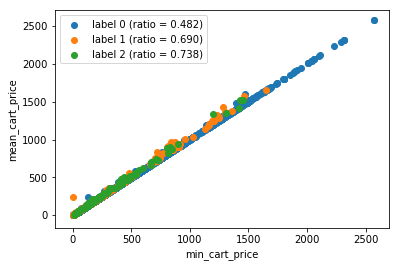

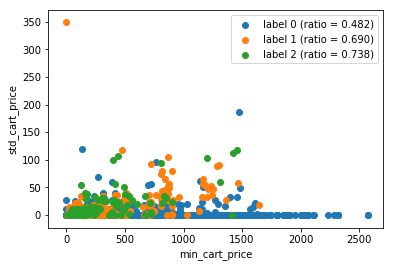

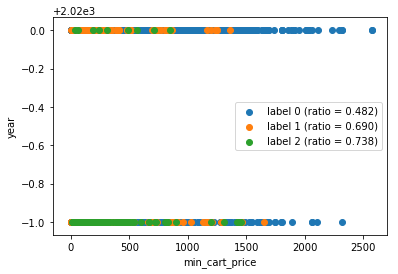

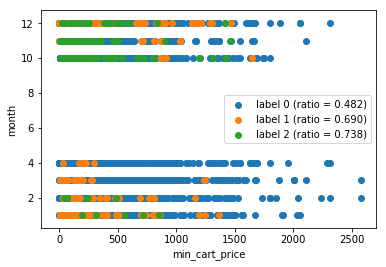

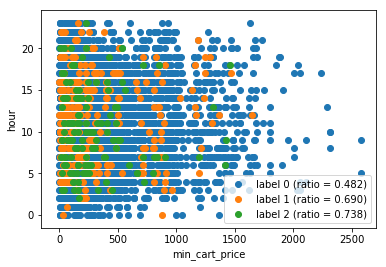

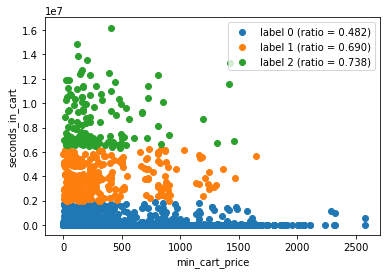

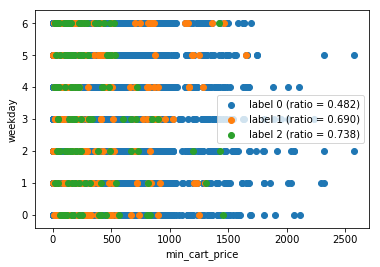

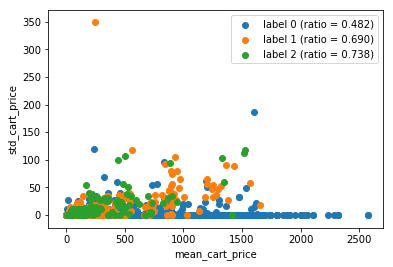

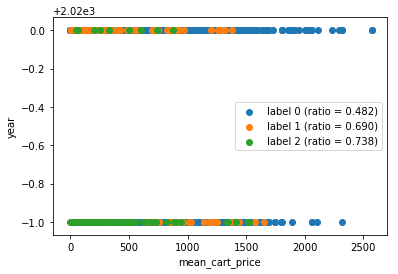

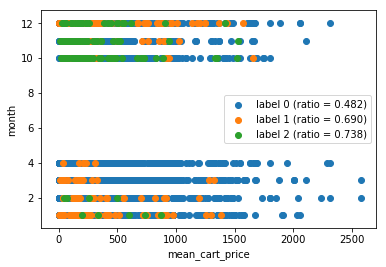

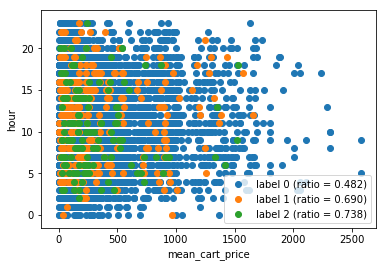

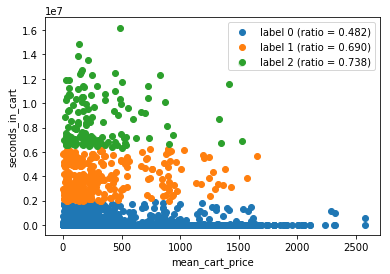

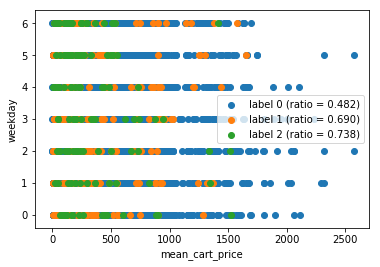

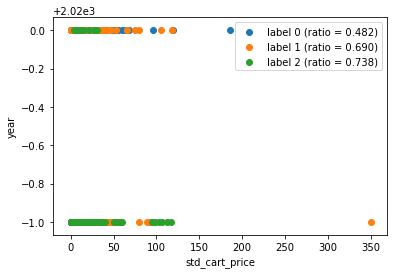

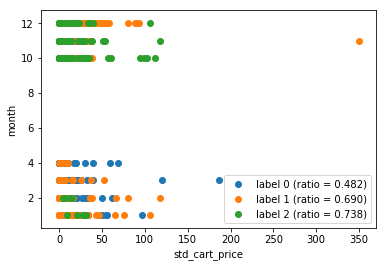

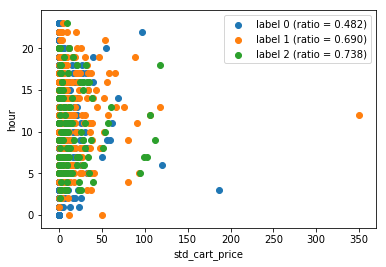

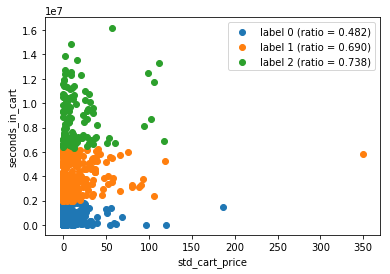

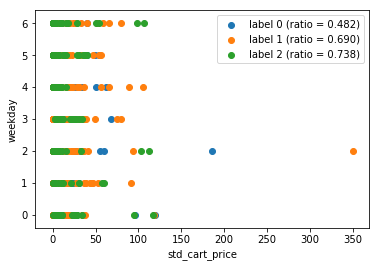

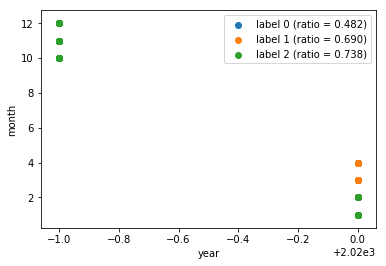

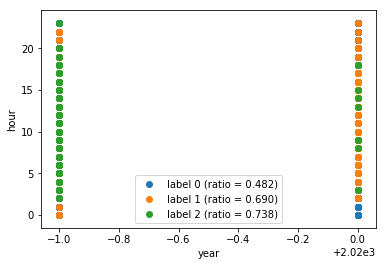

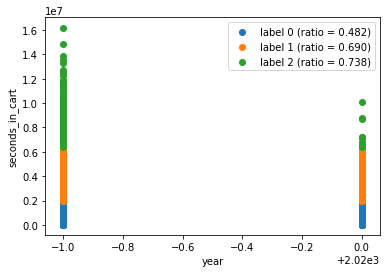

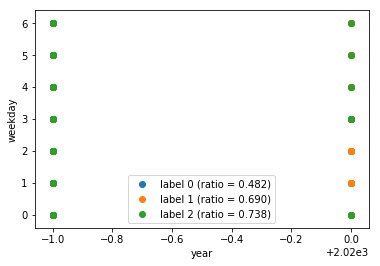

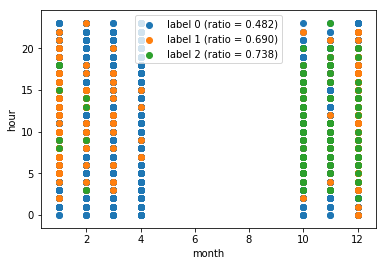

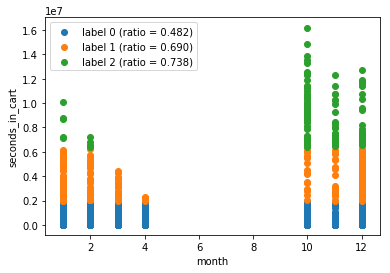

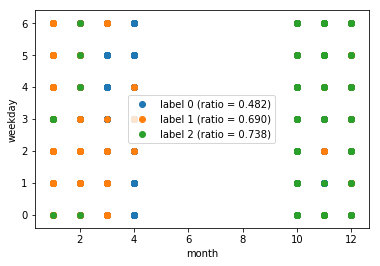

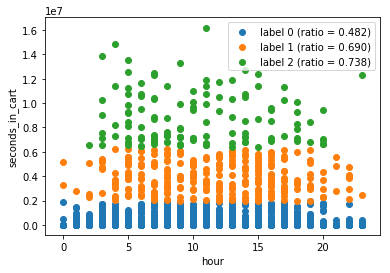

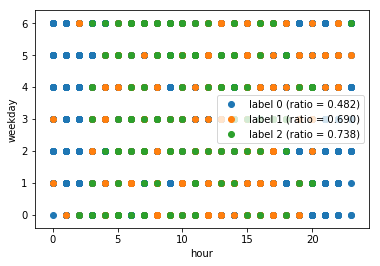

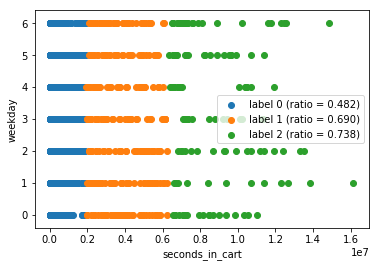

In [163]:
n_features = len(features)
for i in range(n_features):
    j = i+1
    while (j < n_features):
        plot_clusters(X,features[i],features[j],clusters_df)
        j += 1

# SCRAP

In [ ]:
param_dists = {'C':list(np.linspace(0.01,1,num=5)),
               'kernel':['linear'],
               'max_iter':[-1]}

search = RandomizedSearchCV(estimator=svm,
                            param_distributions=param_dists,
                            n_iter=20,
                            verbose=1,
                            cv=5,
                            scoring='roc_auc',
                            n_jobs=-1)

result = search.fit(X_train,y_train)

print('Randomized Search Results\n')
print('Best Score:  ', result.best_score_)
print('Best Params: ', result.best_params_)

lin_svm_clf = SVC(**result.best_params_)
lin_svm = lin_svm_clf.fit(X_train,y_train)

print('\nLinear SVM on Training Data\n')
plot_metrics(lin_svm,X_train,y_train)
print('\nLinear SVM on Testing Data\n')
plot_metrics(lin_svm,X_test,y_test)